In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import joblib

data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'Credit_Score' column
data['Credit_Score'] = label_encoder.fit_transform(data['Credit_Score'])

# Print the mapping of original labels to encoded labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{0: 0, 1: 1, 2: 2}


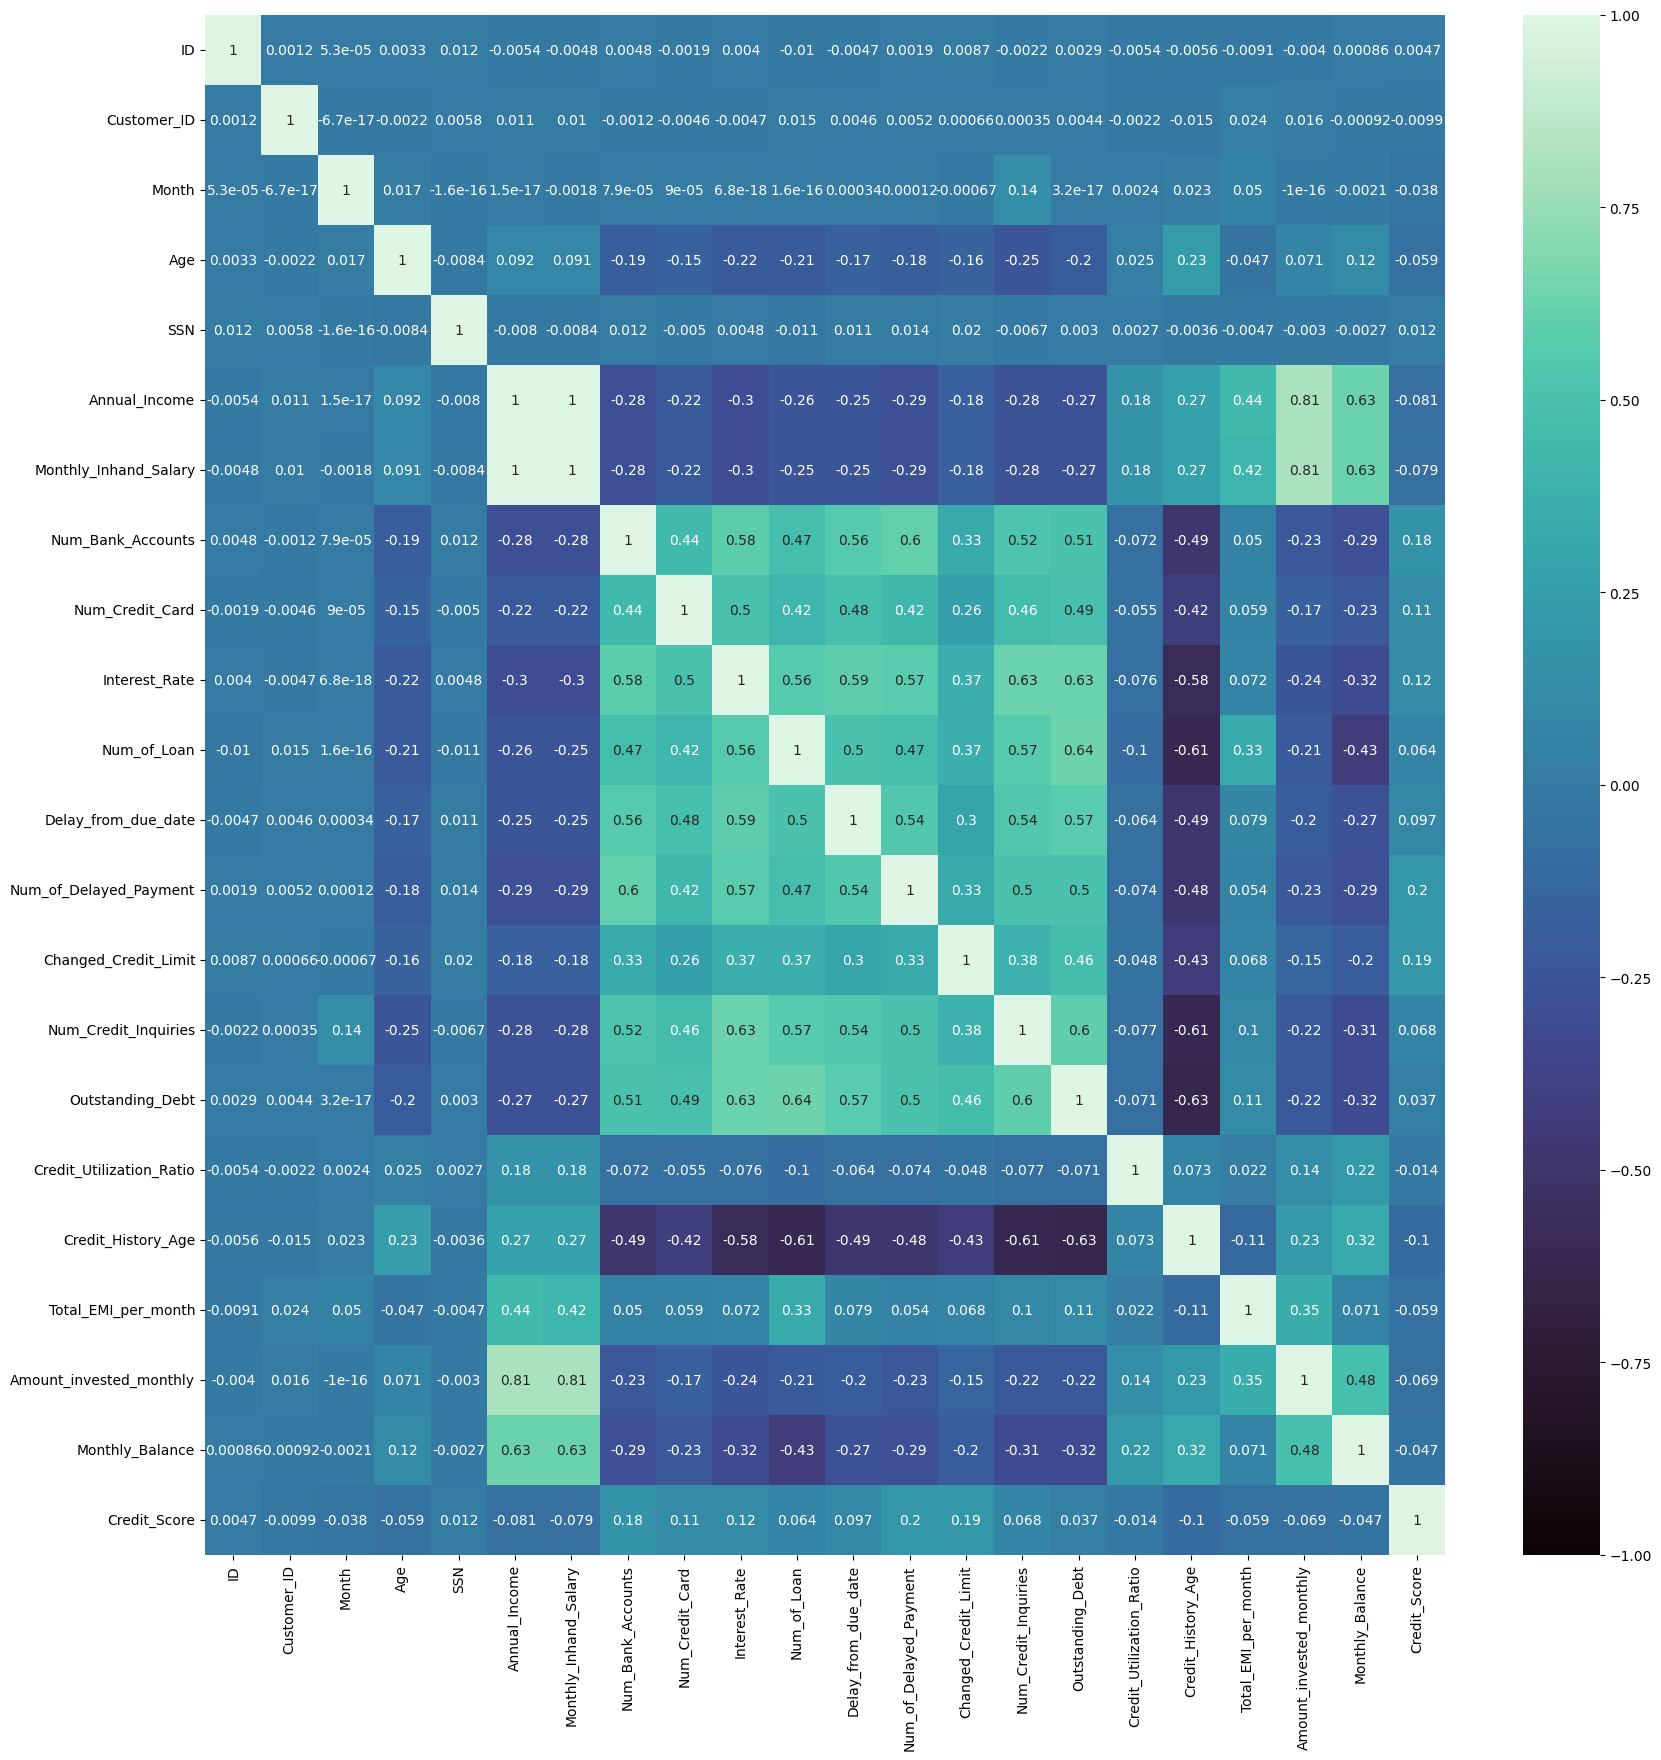

In [6]:
# Remove unnecessary columns
columns_to_remove = ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
data_numeric = data.drop(columns=columns_to_remove)



# vorrelations visulization
corr = data_numeric.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [7]:
data=data.drop(["ID","Customer_ID","Month","Name","Age","SSN","Occupation","Annual_Income","Monthly_Inhand_Salary","Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Credit_History_Age","Payment_of_Min_Amount",
               "Total_EMI_per_month","Amount_invested_monthly","Payment_Behaviour","Monthly_Balance","Type_of_Loan","Credit_Mix"],axis=1)
# splitting
y = label_encoder.fit_transform(data['Credit_Score'])
X = data.drop('Credit_Score', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)


In [9]:
# Define the pipeline with StandardScaler and RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()), ('random_forest', RandomForestClassifier())])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestClassifier())])

In [10]:
# evaluation
print("Accuracy:", pipe.score(X_test, y_test))

Accuracy: 0.7642666666666666


In [12]:
import joblib

# Save the trained model to a file
joblib.dump(pipe, 'task1creditscope (3).pkl')

['creditscorestandardscal1.pkl']